In [51]:
import rasterio
from rasterio.merge import merge
import os
import numpy as np
from rasterio.plot import show

In [35]:
from yaml import load
from yaml.loader import Loader

from helpers.utils import plot_segmentation_scheme

In [52]:
caveName = "10_Lauiloch"
SCAN = 0
root = f"../../real_data/{caveName}"

PROCESSING_FILEPATH = os.path.join(root, "params.yaml")
p = load(open(PROCESSING_FILEPATH), Loader)

SCAN_NAME = p['paths']['scanNames'][SCAN]
shift = p["alignment"]["globalShift"]

In [57]:
SEGMENTS = [0, 1] + list(np.arange(3,20))

toBeFused = SEGMENTS
fp = os.path.normpath(os.path.join(root, "{scan_name}/output", "{scan_name}_{i}_RASTER_Z.tif"))
paths = [fp.format(i=i, scan_name = SCAN_NAME) for i in toBeFused]

In [58]:
to_mosaic = []

In [60]:
for fp in paths:
   src = rasterio.open(fp)
   to_mosaic.append(src)

In [61]:
mosaic, out_trans = rasterio.merge.merge(to_mosaic, nodata = np.nan)

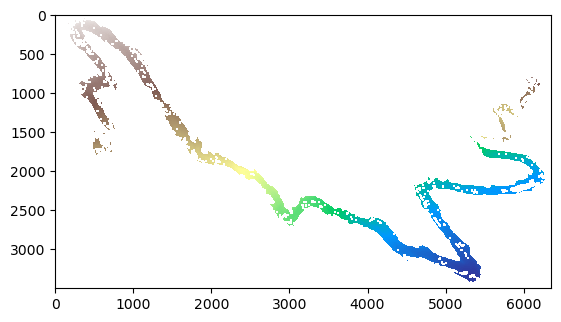

<AxesSubplot:>

In [62]:
show(mosaic, cmap='terrain')

In [63]:
out_meta = src.meta.copy()

In [64]:
out_meta.update({"driver": "GTiff",
                  "height": mosaic.shape[1],
                  "width": mosaic.shape[2],
                 "transform": out_trans
                  }
                 )
 

In [65]:
with rasterio.open(f"../../real_data/{caveName}/{SCAN_NAME}/output/floor.tif", "w", **out_meta) as dest:
    dest.write(mosaic)